# Data Wrangling and Comprehension
---
<br></br>
Data for this project is pulled from the Kaggle Competition 'Predict Future Sales'  
https://www.kaggle.com/c/competitive-data-science-predict-future-sales  

<br></br>
The competition provides a time-series dataset consisting of daily sales data, kindly provided by one of the largest Russian software firms - 1C Company.  

They ask for a model to predict total sales for every product and store in the next month. 
We intend to provide such a model starting here with the wrangling of the provided data.  
<br></br>
<br></br>

#### Module Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn import *

In [2]:
import matplotlib.style as style 

style.use('seaborn-darkgrid')
sns.set_context('notebook')
sns.set_palette('gist_heat')

Setting the styling for graphs 

### Exhaustive Overview of Data Files

In [3]:
os.listdir('../csv_folder')

['test.csv',
 'items.csv',
 'item_categories.csv',
 'sales_train.csv',
 'shops.csv']

- We will need to join the ***items*** and the ***sales_train*** dataframes
- The ***shops*** and ***item_categories*** only contain the names of id values
- The final file ***test*** will be used when submitting predictions

In [4]:
shops = pd.read_csv('../csv_folder/shops.csv')
shops.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


The names of the shops are in russian, should find some encoding that is capable of handling these

In [5]:
item_categs = pd.read_csv('../csv_folder/item_categories.csv')
item_categs.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


As shown above, the ***shops*** and ***item_categories*** only contain the names of id values. These may be useful later but for now we will use only the id values.

In [6]:
test = pd.read_csv('../csv_folder/test.csv')
test.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


Showing the ***test*** data for reference

##### Sales train data frame

In [7]:
train_df = pd.read_csv('../csv_folder/sales_train.csv', 
                      dtype={'shop_id':'int8', 
                            'item_id':'int16',
                            'item_cnt_month':'int32',
                            'date_block_num':'int8'})

This is the provided training data set and will be used as the primary dataframe for training.  
We will use the other dataframes to compliment the information stored here.

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date            object 
 1   date_block_num  int8   
 2   shop_id         int8   
 3   item_id         int16  
 4   item_price      float64
 5   item_cnt_day    float64
dtypes: float64(2), int16(1), int8(2), object(1)
memory usage: 78.4+ MB


In [9]:
train_df.describe()

,date_block_num,shop_id,item_id,item_price,item_cnt_day
count,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06
mean,1.456991e+01,3.300173e+01,1.019723e+04,8.908532e+02,1.242641e+00
std,9.422988e+00,1.622697e+01,6.324297e+03,1.729800e+03,2.618834e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-2.200000e+01
25%,7.000000e+00,2.200000e+01,4.476000e+03,2.490000e+02,1.000000e+00
50%,1.400000e+01,3.100000e+01,9.343000e+03,3.990000e+02,1.000000e+00
75%,2.300000e+01,4.700000e+01,1.568400e+04,9.990000e+02,1.000000e+00
max,3.300000e+01,5.900000e+01,2.216900e+04,3.079800e+05,2.169000e+03


In [10]:
train_df['date_block_num'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33],
      dtype=int8)

***date_block_num***: a consecutive month number, used for convenience. January 2013 is 0, February 2013 is 1,..., October 2015 is 33

/home/ec2-user/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ec2-user/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ec2-user/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use e

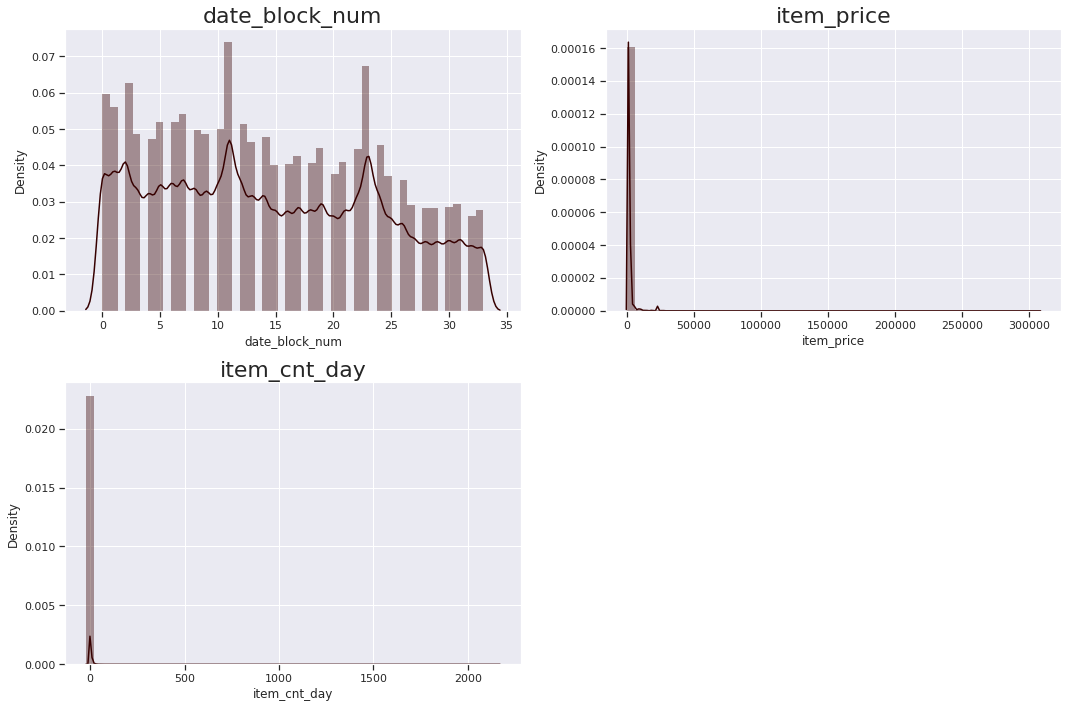

In [11]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

sns.distplot(train_df['date_block_num'], ax=axes[0,0]).set_title('date_block_num', size=22)

sns.distplot(train_df['item_price'], ax=axes[0,1]).set_title('item_price', size=22)

sns.distplot(train_df['item_cnt_day'], ax=axes[1,0], kde_kws={'bw': 0.1}).set_title('item_cnt_day', size=22)

axes[1,1].set_visible(False)

plt.tight_layout()

In [12]:
train_df['item_cnt_day'].nunique()

198

This number describes the unique value for quantity of items sold on a given day.

In [13]:
train_df.index.nunique()

2935849

count of rows in index

In [14]:
train_df.isnull().sum()

date              0
date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
dtype: int64

Dataframe contains no missing values

##### items data frame

In [15]:
items = pd.read_csv('../csv_folder/items.csv')

In [16]:
items.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


They have provided predetrimined categories for each item which could save us some time with clustering 

In [17]:
items['item_category_id'].nunique()

84

There are 84 different categories for items

In [18]:
items.isnull().sum()

item_name           0
item_id             0
item_category_id    0
dtype: int64

Dataframe contains no missing values

***A pivot table to give a better visual understanding of the data***

In [19]:
train_df.pivot_table(index = ['shop_id','item_id'],
                     values = ['item_cnt_day'],
                     columns = ['date_block_num'],
                     fill_value = 0,
                     aggfunc='sum').head()

item_cnt_day                              ...                 \
date_block_num            0   1  2  3  4  5  6  7  8  9   ... 24 25 26 27 28   
shop_id item_id                                           ...                  
0       30                 0  31  0  0  0  0  0  0  0  0  ...  0  0  0  0  0   
        31                 0  11  0  0  0  0  0  0  0  0  ...  0  0  0  0  0   
        32                 6  10  0  0  0  0  0  0  0  0  ...  0  0  0  0  0   
        33                 3   3  0  0  0  0  0  0  0  0  ...  0  0  0  0  0   
        35                 1  14  0  0  0  0  0  0  0  0  ...  0  0  0  0  0   

                                
date_block_num  29 30 31 32 33  
shop_id item_id                 
0       30       0  0  0  0  0  
        31       0  0  0  0  0  
        32       0  0  0  0  0  
        33       0  0  0  0  0  
        35       0  0  0  0  0  

[5 rows x 34 columns]

### Handling missing null values

The provided data does not contain records for months where an item has sale count of zero.  
We will need to add these to our data frame so that our models have a consistent time frame from one item to the next.

In [20]:
train_df.drop(['item_price'], axis=1, inplace=True)

First we will aggregate daily item counts into monthly counts.  
This will greatly reduce the size of our data and accuratly measures the requested period of prediction 

In [21]:
train_df['date'] = pd.to_datetime(train_df['date'], dayfirst=True)
train_df['year'] = train_df.date.dt.year
train_df['month'] = train_df.date.dt.month

key_df = train_df[['date_block_num', 'year', 'month']].groupby(['date_block_num', 'year', 'month']).count().reset_index().set_index(['year', 'month'])
key_df.sort_values('date_block_num', ascending=True, inplace=True)

Making a key to recover the date block number because the next step will remove this column 

In [22]:
####
# Writing to file for recovery to allow of a mid-notebook boot (incase there is insufficient ram)
####
# key_df.to_csv('wrangled_data/key_dateblock.csv', index=True)

This is a mid notebook load that can be used for testing as to not compile the entire notebook

In [23]:
train_df = train_df.groupby([c for c in train_df.columns if c not in ['item_cnt_day']], as_index=False)[['item_cnt_day']].sum()
train_df = train_df.rename(columns={'item_cnt_day':'item_cnt_month'})

train_df = pd.DataFrame(train_df.groupby(['shop_id', 'item_id', 'year', 'month'])['item_cnt_month'].sum()).reset_index()

Aggregating the item sales count into months since that is the figure we are being asked to predict

In [24]:
train_df.head(2)

,shop_id,item_id,year,month,item_cnt_month
0,0,30,2013,2,31.0
1,0,31,2013,2,11.0


---  
***Fill missing rows***  
Creating rows for items that have zero count sales at a store for a given month

In [25]:
shop_items = test[['shop_id', 'item_id']].values
year = train_df.year.unique()
month = train_df.month.unique()
dates = [(y, m) for y in year for m in month]

In [26]:
shop_items.size

428400

In [27]:
index = pd.DataFrame([(d[0], d[1], k[0], k[1]) for d in dates for k in shop_items], 
                     columns=['year', 'month', 'shop_id', 'item_id'])

In [28]:
index.sort_values(by=['shop_id', 'item_id', 'year', 'month']).head()

,year,month,shop_id,item_id
237187,2013,1,2,30
22987,2013,2,2,30
665587,2013,3,2,30
879787,2013,4,2,30
1093987,2013,5,2,30


We will use this index to generate a null records when merged with the original training data

In [29]:
# train_df['date'] = pd.to_datetime(train_df[['year', 'month']].assign(DAY=1))
train_df = pd.merge(index, train_df, 
                    how='left', 
                    on=['shop_id', 'item_id', 'year', 'month'])

In [30]:
del index

In [31]:
train_df.drop_duplicates(inplace=True)

In [32]:
train_df.isna().sum()

year                    0
month                   0
shop_id                 0
item_id                 0
item_cnt_month    7111041
dtype: int64

Great! now we have a consistent time period for every item 

In [33]:
train_df['item_cnt_month'].fillna(0, inplace=True)

Filling the nulls with the appropriate sales count of zero

In [34]:
train_df.isna().sum()

year              0
month             0
shop_id           0
item_id           0
item_cnt_month    0
dtype: int64

No more null values, this dataframe is ready to go

### Merging the remaining dataframes

In [35]:
test.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [36]:
train_df = pd.merge(test, train_df, on = ['item_id','shop_id'], how='left')

In [37]:
train_df.isna().sum()

ID                0
shop_id           0
item_id           0
year              0
month             0
item_cnt_month    0
dtype: int64

In [38]:
train_df.head()

,ID,shop_id,item_id,year,month,item_cnt_month
0,0,5,5037,2013,2,0.0
1,0,5,5037,2013,1,0.0
2,0,5,5037,2013,6,0.0
3,0,5,5037,2013,3,0.0
4,0,5,5037,2013,4,0.0


In [39]:
# tmp = pd.DataFrame(train_df.groupby(['shop_id', 'item_id'])['item_cnt_month'].apply(lambda c: c.abs().sum()))

In [40]:
# train_df.set_index(['shop_id', 'item_id'], inplace=True)

In [41]:
# train_df = train_df.loc[tmp[tmp['item_cnt_month'] != 0].index]
# del tmp

In [42]:
# train_df.reset_index(inplace=True)

In [43]:
train_df = pd.merge(train_df, key_df, how='left', on=['year', 'month'])

In [44]:
train_df = train_df[~train_df['date_block_num'].isna()]

### Some Feature Engineering
---  

***Mean & Mode feature for items per store***

In [45]:
# Find mean sales for item at a store
agg_shop_item = pd.DataFrame(train_df[['shop_id', 'item_id', 'item_cnt_month']].groupby(['shop_id', 'item_id'], as_index=False).agg([np.mean, pd.Series.mode]))
agg_shop_item.columns = agg_shop_item.columns.droplevel()
agg_shop_item = agg_shop_item.rename(columns={'mean':'mean_item', 'mode':'mode_item'})

# Add mode to training set
train_df = pd.merge(train_df, agg_shop_item, how='left', on=['shop_id','item_id'])

Creating a feature for the mean of item sales count of each month 

In [46]:
# Add all item features
train_df = pd.merge(train_df, items.drop(columns=['item_category_id']), how='left', on='item_id')

Merging the items dataframe into the our current training dataframe 

In [47]:
train_df = pd.merge(train_df, items.drop(columns=['item_name']), how='left', on='item_id')
train_df.head()

,ID,shop_id,item_id,year,month,item_cnt_month,date_block_num,mean_item,mode_item,item_name,item_category_id
0,0,5,5037,2013,2,0.0,1.0,0.382353,0,"NHL 15 [PS3, русские субтитры]",19
1,0,5,5037,2013,1,0.0,0.0,0.382353,0,"NHL 15 [PS3, русские субтитры]",19
2,0,5,5037,2013,6,0.0,5.0,0.382353,0,"NHL 15 [PS3, русские субтитры]",19
3,0,5,5037,2013,3,0.0,2.0,0.382353,0,"NHL 15 [PS3, русские субтитры]",19
4,0,5,5037,2013,4,0.0,3.0,0.382353,0,"NHL 15 [PS3, русские субтитры]",19


In [48]:
# Adding item category features
train_df = pd.merge(train_df, item_categs, how='left', on='item_category_id')

Merging the item cetegory dataframe into the our current training dataframe 

In [49]:
# Adding shop feature
train_df = pd.merge(train_df, shops, how='left', on='shop_id')

Merging the shops dataframe into the our current training dataframe 

In [50]:
train_df.head(2)

,ID,shop_id,item_id,year,month,item_cnt_month,date_block_num,mean_item,mode_item,item_name,item_category_id,item_category_name,shop_name
0,0,5,5037,2013,2,0.0,1.0,0.382353,0,"NHL 15 [PS3, русские субтитры]",19,Игры - PS3,"Вологда ТРЦ ""Мармелад"""
1,0,5,5037,2013,1,0.0,0.0,0.382353,0,"NHL 15 [PS3, русские субтитры]",19,Игры - PS3,"Вологда ТРЦ ""Мармелад"""


The resulting training data after the merge

In [51]:
test['month']=11
test['year']=2015
test['date_block_num']=34

Adding the prediction value to testing data

In [52]:
# Adding mean feature
test = pd.merge(test, agg_shop_item, how='left', on=['shop_id', 'item_id']).fillna(0.)
# Add all item features
test = pd.merge(test, items, how='left', on='item_id')
# Adding item category features
test = pd.merge(test, item_categs, how='left', on='item_category_id')
# Adding shop feature
test = pd.merge(test, shops, how='left', on='shop_id')

Takes the same features we created for the training data and adds them to our teting data

In [53]:
test['item_cnt_month']=0.

---  

In [54]:
####
# Turns mode from series to float for training data
####
tmp = train_df['mode_item'].copy()
tri = pd.DataFrame([np.mean(i) for i in tmp])
train_df['mode_item'] = tri

train_df['mode_item'][train_df[train_df['mode_item'].isna()].index] = train_df['mean_item'][train_df[train_df['mode_item'].isna()].index]

####
# Turns mode from series to float for test data
####
tmp = test['mode_item'].copy()
tri = pd.DataFrame([np.mean(i) for i in tmp])
test['mode_item'] = tri

test['mode_item'][test[test['mode_item'].isna()].index] = test['mean_item'][test[test['mode_item'].isna()].index]

/home/ec2-user/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/ec2-user/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/ipykernel/__main__.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [55]:
# key_df = pd.read_csv('../wrangled_data/key_dateblock.csv')

###
# Writing to file for recovery to allow of a mid-notebook boot (incase there is insufficient ram)
###
train_df.to_csv('../wrangled_data/train_compress_index.csv', index=False)
test.to_csv('../wrangled_data/test_index.csv', index=False)

#####
test = pd.read_csv('../wrangled_data/test_index.csv')
train_df = pd.read_csv('../wrangled_data/train_compress_index.csv', 
                       dtype={'shop_id':'int8', 
                            'item_id':'int16',
                            'year':'int16',
                            'month':'int8',
                            'item_cnt_month':'int32',
                            'date_block_num':'int8',
                            'mean_item':'float64',
                            'mode_item':'float64'})

Here is another mid notebook load used for testing as to avoid compiling the entire notebook

---  
***Some label encoding for the names of items***  
May want to write csv before this and do further encoding in the preprocessing notebook  

In [56]:
train_df.head()

,ID,shop_id,item_id,year,month,item_cnt_month,date_block_num,mean_item,mode_item,item_name,item_category_id,item_category_name,shop_name
0,0,5,5037,2013,2,0,1,0.382353,0.0,"NHL 15 [PS3, русские субтитры]",19,Игры - PS3,"Вологда ТРЦ ""Мармелад"""
1,0,5,5037,2013,1,0,0,0.382353,0.0,"NHL 15 [PS3, русские субтитры]",19,Игры - PS3,"Вологда ТРЦ ""Мармелад"""
2,0,5,5037,2013,6,0,5,0.382353,0.0,"NHL 15 [PS3, русские субтитры]",19,Игры - PS3,"Вологда ТРЦ ""Мармелад"""
3,0,5,5037,2013,3,0,2,0.382353,0.0,"NHL 15 [PS3, русские субтитры]",19,Игры - PS3,"Вологда ТРЦ ""Мармелад"""
4,0,5,5037,2013,4,0,3,0.382353,0.0,"NHL 15 [PS3, русские субтитры]",19,Игры - PS3,"Вологда ТРЦ ""Мармелад"""


In [57]:
# Label encoding
for c in ['shop_name', 'item_name', 'item_category_name']:
    lbl = preprocessing.LabelEncoder()
    lbl.fit(list(train_df[c].unique())+list(test[c].unique()))
    train_df[c]=lbl.transform(train_df[c].astype(str))
    test[c]=lbl.transform(test[c].astype(str))
    print(c)

shop_name
item_name
item_category_name


---  
---  
### Building a baseline model using Extra Trees Regressor from sci-kit learn

In [58]:
# Train and predict using random forest 
col = [c for c in train_df.columns if c not in ['item_cnt_month']]
x1 = train_df[train_df['date_block_num']<33]
y1 = np.log1p(x1['item_cnt_month'].clip(0.,20.))
x1 = x1[col]
x2 = train_df[train_df['date_block_num'] == 33]
y2 = np.log1p(x2['item_cnt_month'].clip(0, 20.))
x2 = x2[col]

Creating a method to test our model without having to submit by using the most resent month as a hypothetical future month and then using the values of that month to validate the effectivness of the model

In [59]:
reg = ensemble.ExtraTreesRegressor(n_estimators=30, n_jobs=-1, max_depth=20, random_state=18)
reg.fit(x1,y1)
print('RMSE value is :', np.sqrt(metrics.mean_squared_error(y2.clip(0., 20.), reg.predict(x2).clip(0., 20.))))

RMSE value is : 0.30056114345597346


Since the competition grades models based upon the RMSE metric we will use that to evaluate our model so that we are optimizing in that direction

In [60]:
reg.fit(train_df[col], train_df['item_cnt_month'].clip(0., 20.))
test['item_cnt_month'] = reg.predict(test[col]).clip(0., 20.)

### Submit this file to the competion for grading 

In [62]:
test[['ID', 'item_cnt_month']].to_csv('../submission_files/submit.csv', index=False)

Writing the predictions to a csv file

---  
***Writing training and testing data into csv files***

In [63]:
test.drop(columns=['item_cnt_month']).to_csv('../wrangled_data/testing_post_wrangle_small.csv', index=False)
train_df.to_csv('../wrangled_data/training_post_wrangle_small.csv', index=False)

In [64]:
test.size

2784600

In [65]:
test.head()

,ID,shop_id,item_id,month,year,date_block_num,mean_item,mode_item,item_name,item_category_id,item_category_name,shop_name,item_cnt_month
0,0,5,5037,11,2015,34,0.382353,0.0,1195,19,11,3,5.523605e-01
1,1,5,5320,11,2015,34,0.000000,0.0,1254,55,39,3,2.107171e-06
2,2,5,5233,11,2015,34,0.294118,0.0,1239,19,11,3,5.516304e-01
3,3,5,5232,11,2015,34,0.029412,0.0,1238,23,15,3,2.096406e-01
4,4,5,5268,11,2015,34,0.000000,0.0,1245,20,12,3,1.805393e-07


In [66]:
test.drop_duplicates().shape

(214200, 13)

This test dataframe will be useful for our later models so it is written to a csv 